In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
names = ['age','workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','target']
df_adult = pd.read_csv('adult.csv', names = names)
df_adult.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


- age:                나이
- workclass:          노동 계급 
- fnlwgt:             가중치..?
- education:          교육
- education-num:      교육 수
- marital-status:     결혼 상태
- occupation:         직업
- relationship:       가족내에서 관계
- race:               인종
- sex:                성별
- capital-gain:       자본이득 
- capital-loss:       자본손실
- hours-per-week:     주당 근로시간
- native-country:     출신 국가


In [220]:
df_adult.shape

(32561, 15)

In [221]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [222]:
# 5만 달러 넘는 비율
print(df_adult['target'].value_counts())

 <=50K    24720
 >50K      7841
Name: target, dtype: int64


In [223]:
df_adult.isnull().sum() # null값은 없음.

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [224]:
df_adult['native-country'].value_counts() # ?있는것 확인가능

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [225]:
print(df_adult['native-country'].unique()) # unique쓰면 열의 고유값 확인가능(?값 확인가능)

[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


In [226]:
df_adult['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [227]:
df_adult['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [228]:
# replace()로 데이터 값 중에 ? -> NaN으로 바꾸기
df_adult.replace(' ?', np.nan, inplace = True)
df_adult.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64

In [229]:
df_adult.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [230]:
# dropna() 로 NaN 값 없애주기
df_adult = df_adult.fillna('Others')
# df_adult = df_adult.dropna(axis = 0)
df_adult.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [231]:
# 인덱스 새로 배정하기
df_adult=df_adult.reset_index(inplace = False, drop = True)
df_adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [232]:
df_adult.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
target            False
dtype: bool

In [233]:
df_adult.shape

(32561, 15)

In [234]:
# fnlwgt와 marital-status, relationshop 제거하기

df_adult.drop(['fnlwgt', 'marital-status', 'relationship'], axis = 1, inplace = True)

In [235]:
# 레이블 인코더 사용해서 문자열을 숫자로 바꾸기
from sklearn.preprocessing import LabelEncoder
col=names=['workclass', 'education', 'occupation', 'race', 'sex', 'native-country',
          'target']
le = LabelEncoder()
for k in col:
    df_adult[k] = le.fit_transform(df_adult[k])
    
df_adult.head(20)

,age,workclass,education,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,6,9,13,0,4,1,2174,0,40,38,0
1,50,5,9,13,3,4,1,0,0,13,38,0
2,38,3,11,9,5,4,1,0,0,40,38,0
3,53,3,1,7,5,2,1,0,0,40,38,0
4,28,3,9,13,9,2,0,0,0,40,4,0
5,37,3,12,14,3,4,0,0,0,40,38,0
6,49,3,6,5,7,2,0,0,0,16,22,0
7,52,5,11,9,3,4,1,0,0,45,38,1
8,31,3,12,14,9,4,0,14084,0,50,38,1
9,42,3,9,13,3,4,1,5178,0,40,38,1


In [236]:
# from pandas import Series

# feature_importance = medel.feature_importance_
# Series_feat_imp=Series(feature_importance, index = df_adult.columns)

In [237]:
# result = pd.DataFrame({'feature':df_adult.columns,'importances':df_adult.feature_importances_})

In [238]:
# import seaborn as sns
# import numpy as np
# %matplotlib inline
# # feature importance 추출해보기
# print('Feature importances:\n{0}'.format(np.round(df_adult.feature_importances_, 3)))
# # feature별 importance 매핑
# for name, value in zip(names, df_adult.feature_importnaces_):
#     print('{0} : {1:3f}'.format(name, value))
# # feature importance를 column 별로 시각화 하기
# sns.barplot(x = df_adult.feature_importances_, y= names)

In [239]:
# 데이터 비율 맞춰주기 위해 Standardscaler 적용하기
from sklearn.preprocessing import StandardScaler
Xdf = df_adult.loc[:, 'age':'native-country']
ydf = df_adult.loc[:, 'target']

scaler = StandardScaler()
scaler.fit(Xdf)
adult_scaled = scaler.transform(Xdf)

In [240]:
names=['age', 'workclass', 'education', 'education-num' ,'occupation', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
df_adult = pd.DataFrame(data = adult_scaled, columns = names)
df_adult.head()

,age,workclass,education,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.030671,1.658412,-0.335437,1.134739,-1.483582,0.393668,0.703071,0.148453,-0.21666,-0.035429,0.251378
1,0.837109,1.026306,-0.335437,1.134739,-0.790510,0.393668,0.703071,-0.145920,-0.21666,-2.222153,0.251378
2,-0.042642,-0.237906,0.181332,-0.420060,-0.328461,0.393668,0.703071,-0.145920,-0.21666,-0.035429,0.251378
3,1.057047,-0.237906,-2.402511,-1.197459,-0.328461,-1.962621,0.703071,-0.145920,-0.21666,-0.035429,0.251378
4,-0.775768,-0.237906,-0.335437,1.134739,0.595635,-1.962621,-1.422331,-0.145920,-0.21666,-0.035429,-5.337971


In [241]:
df_adult['target']=ydf
df_adult.head()

,age,workclass,education,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,0.030671,1.658412,-0.335437,1.134739,-1.483582,0.393668,0.703071,0.148453,-0.21666,-0.035429,0.251378,0
1,0.837109,1.026306,-0.335437,1.134739,-0.790510,0.393668,0.703071,-0.145920,-0.21666,-2.222153,0.251378,0
2,-0.042642,-0.237906,0.181332,-0.420060,-0.328461,0.393668,0.703071,-0.145920,-0.21666,-0.035429,0.251378,0
3,1.057047,-0.237906,-2.402511,-1.197459,-0.328461,-1.962621,0.703071,-0.145920,-0.21666,-0.035429,0.251378,0
4,-0.775768,-0.237906,-0.335437,1.134739,0.595635,-1.962621,-1.422331,-0.145920,-0.21666,-0.035429,-5.337971,0


In [242]:
X = df_adult.loc[:, 'age':'native-country']
y = df_adult.loc[:, 'target']

In [243]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [244]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 배웠던 평가지표를 구현하는 함수
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [245]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(clf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(clf.score(X_test, y_test)))
print()
pred=clf.predict(X_test)
get_clf_eval(y_test , pred)

훈련 세트 정확도: 0.844
테스트 세트 정확도: 0.820

오차 행렬
[[5692  467]
 [1000  982]]
정확도: 0.8198, 정밀도: 0.6777, 재현율: 0.4955,    F1: 0.5724, AUC:0.7098


In [246]:
# SVM

import time
start = time.time()

from sklearn import svm
clf = svm.SVC(gamma = 0.01, C =50.)
clf.fit(X_train, y_train)

print("훈련 세트 정확도: {: .3f}".format(clf.score(X_train, y_train)))
print("테스트 세트 정확도: {: .3f}".format(clf.score(X_test, y_test)))

print()
pred = clf.predict(X_test)
get_clf_eval(y_test, pred)

print(time.time()-start)

훈련 세트 정확도:  0.836
테스트 세트 정확도:  0.828

오차 행렬
[[5891  268]
 [1130  852]]
정확도: 0.8283, 정밀도: 0.7607, 재현율: 0.4299,    F1: 0.5493, AUC:0.6932
44.81222915649414


In [254]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C = 0.1, max_iter = 5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(clf.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(clf.score(X_test, y_test)))

print()
pred=clf.predict(X_test)
get_clf_eval(y_test, pred)

훈련 세트 점수: 0.825
테스트 세트 점수: 0.821

오차 행렬
[[5815  344]
 [1113  869]]
정확도: 0.8210, 정밀도: 0.7164, 재현율: 0.4384,    F1: 0.5440, AUC:0.6913


In [247]:
# 결정트리분류기
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 8)
clf.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(clf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(clf.score(X_test, y_test)))
print()
pred = clf.predict(X_test)
get_clf_eval(y_test, pred)

훈련 세트 정확도: 0.848
테스트 세트 정확도: 0.839

오차 행렬
[[5808  351]
 [ 961 1021]]
정확도: 0.8388, 정밀도: 0.7442, 재현율: 0.5151,    F1: 0.6088, AUC:0.7291


Feature imortances:
[0.164 0.001 0.005 0.22  0.006 0.    0.086 0.377 0.098 0.042 0.001]
age : 0.164
workclass : 0.000934
education : 0.00476
education-num : 0.22
occupation : 0.00635
race : 0.0
sex : 0.0865
capital-gain : 0.377
capital-loss : 0.0981
hours-per-week : 0.0417
native-country : 0.00114


<AxesSubplot:>

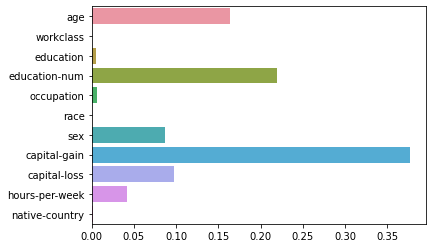

In [248]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출하기
print("Feature imortances:\n{0}".format(np.round(clf.feature_importances_, 3)))
# feature별 importance 매핑
for name, value in zip(names, clf.feature_importances_):
    print('{0} : {1:.3}'.format(name, value))
# feature imoprtance를 column 별로 시각화 하기
sns.barplot(x = clf.feature_importances_, y=names)

In [250]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# 최적의 파라미터 찾기 : Grid Serchy
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [100, 300],
    'max_depth': [10, 12, 14, 16],
    'min_samples_leaf' : [4, 6, 8, 10],
    'min_samples_split' : [8, 10, 12, 14] 
}

# RandomForestClassifier 객체 생성 후 GridSerchCV 수행하기
clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(clf, param_grid=params , cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: 
 {'max_depth': 14, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
최고 예측 정확도: 0.8471


In [277]:
# 랜덤포레스트 실행
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth= 10, min_samples_leaf = 4, min_samples_split = 10,
                            n_estimators = 300)
clf.fit(X_train, y_train)


print("훈련 세트 정확도: {:.3f}".format(clf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}\n".format(clf.score(X_test, y_test)))
pred = clf.predict(X_test)
get_clf_eval(y_test, pred)

훈련 세트 정확도: 0.853
테스트 세트 정확도: 0.842

오차 행렬
[[5912  247]
 [1039  943]]
정확도: 0.8420, 정밀도: 0.7924, 재현율: 0.4758,    F1: 0.5946, AUC:0.7178


Feature importances:
[0.174 0.015 0.035 0.195 0.036 0.005 0.081 0.284 0.076 0.093 0.005]
native-country : 0.174
native-country : 0.015
native-country : 0.035
native-country : 0.195
native-country : 0.036
native-country : 0.005
native-country : 0.081
native-country : 0.284
native-country : 0.076
native-country : 0.093
native-country : 0.005


<AxesSubplot:>

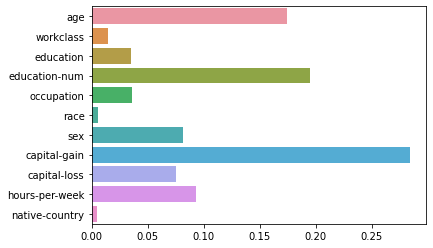

In [278]:
import seaborn as sns
import numpy as np
%matplotlib inline
# feature importance 추출
print("Feature importances:\n{0}".format(np.round(clf.feature_importances_, 3)))
# feature 별 importance 매핑하기
for namte, value in zip(names, clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
# feature importance를 column 별로 시각화 하기
sns.barplot(x=clf.feature_importances_ , y = names)

In [279]:
# adaboost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(clf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}\n".format(clf.score(X_test, y_test)))
pred = clf.predict(X_test)
get_clf_eval(y_test, pred)

훈련 세트 정확도: 0.850
테스트 세트 정확도: 0.844

오차 행렬
[[5854  305]
 [ 969 1013]]
정확도: 0.8435, 정밀도: 0.7686, 재현율: 0.5111,    F1: 0.6139, AUC:0.7308


Feature importances:
[0.18 0.04 0.08 0.06 0.08 0.02 0.04 0.28 0.18 0.04 0.  ]
age : 0.180
workclass : 0.040
education : 0.080
education-num : 0.060
occupation : 0.080
race : 0.020
sex : 0.040
capital-gain : 0.280
capital-loss : 0.180
hours-per-week : 0.040
native-country : 0.000


<AxesSubplot:>

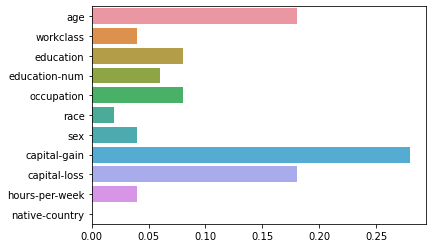

In [280]:
import seaborn as sns
import numpy as np
%matplotlib inline
# feature importance 추출
print("Feature importances:\n{0}".format(np.round(clf.feature_importances_,
3)))
# feature별 importance 매핑
for name, value in zip(names , clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
# feature importance를 column 별로 시각화 하기
sns.barplot(x=clf.feature_importances_ , y=names)

In [281]:
# GBM
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1)
clf.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(clf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}\n".format(clf.score(X_test, y_test)))
pred = clf.predict(X_test)
get_clf_eval(y_test, pred)

훈련 세트 정확도: 0.869
테스트 세트 정확도: 0.856

오차 행렬
[[5842  317]
 [ 853 1129]]
정확도: 0.8563, 정밀도: 0.7808, 재현율: 0.5696,    F1: 0.6587, AUC:0.7591


Feature importances:
[0.164 0.013 0.003 0.191 0.035 0.004 0.078 0.334 0.104 0.069 0.004]
age : 0.164
workclass : 0.013
education : 0.003
education-num : 0.191
occupation : 0.035
race : 0.004
sex : 0.078
capital-gain : 0.334
capital-loss : 0.104
hours-per-week : 0.069
native-country : 0.004


<AxesSubplot:>

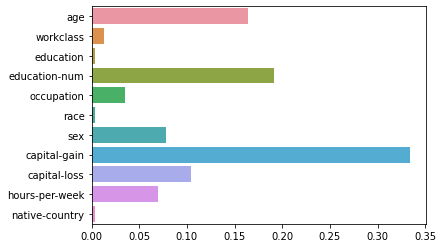

In [282]:
import seaborn as sns
import numpy as np
%matplotlib inline
# feature importance 추출
print("Feature importances:\n{0}".format(np.round(clf.feature_importances_,
3)))
# feature별 importance 매핑
for name, value in zip(names , clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
# feature importance를 column 별로 시각화 하기
sns.barplot(x=clf.feature_importances_ , y=names)

In [264]:
!pip install xgboost

You should consider upgrading via the 'c:\users\ad\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [265]:
# XGB
import xgboost as xgb
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트하기
from xgboost import XGBClassifier

evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 400 , eval_set = evals, eval_metric = "logloss",
               verbose = True)
w_preds = xgb_wrapper.predict(X_test)

[0]	validation_0-logloss:0.64882
[1]	validation_0-logloss:0.61264
[2]	validation_0-logloss:0.58256
[3]	validation_0-logloss:0.55754
[4]	validation_0-logloss:0.53584
[5]	validation_0-logloss:0.51746
[6]	validation_0-logloss:0.50128
[7]	validation_0-logloss:0.48722
[8]	validation_0-logloss:0.47484
[9]	validation_0-logloss:0.46446
[10]	validation_0-logloss:0.45431
[11]	validation_0-logloss:0.44561
[12]	validation_0-logloss:0.43814
[13]	validation_0-logloss:0.43123
[14]	validation_0-logloss:0.42518
[15]	validation_0-logloss:0.41948


c:\users\ad\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16]	validation_0-logloss:0.41448
[17]	validation_0-logloss:0.41013
[18]	validation_0-logloss:0.40579
[19]	validation_0-logloss:0.40219
[20]	validation_0-logloss:0.39892
[21]	validation_0-logloss:0.39603
[22]	validation_0-logloss:0.39337
[23]	validation_0-logloss:0.39085
[24]	validation_0-logloss:0.38859
[25]	validation_0-logloss:0.38635
[26]	validation_0-logloss:0.38453
[27]	validation_0-logloss:0.38274
[28]	validation_0-logloss:0.38110
[29]	validation_0-logloss:0.37954
[30]	validation_0-logloss:0.37812
[31]	validation_0-logloss:0.37662
[32]	validation_0-logloss:0.37540
[33]	validation_0-logloss:0.37371
[34]	validation_0-logloss:0.37250
[35]	validation_0-logloss:0.37136
[36]	validation_0-logloss:0.37027
[37]	validation_0-logloss:0.36890
[38]	validation_0-logloss:0.36804
[39]	validation_0-logloss:0.36719
[40]	validation_0-logloss:0.36648
[41]	validation_0-logloss:0.36475
[42]	validation_0-logloss:0.36396
[43]	validation_0-logloss:0.36304
[44]	validation_0-logloss:0.36231
[45]	validatio

[252]	validation_0-logloss:0.32499
[253]	validation_0-logloss:0.32491
[254]	validation_0-logloss:0.32492
[255]	validation_0-logloss:0.32484
[256]	validation_0-logloss:0.32483
[257]	validation_0-logloss:0.32483
[258]	validation_0-logloss:0.32479
[259]	validation_0-logloss:0.32476
[260]	validation_0-logloss:0.32476
[261]	validation_0-logloss:0.32475
[262]	validation_0-logloss:0.32478
[263]	validation_0-logloss:0.32479
[264]	validation_0-logloss:0.32478
[265]	validation_0-logloss:0.32476
[266]	validation_0-logloss:0.32479
[267]	validation_0-logloss:0.32472
[268]	validation_0-logloss:0.32463
[269]	validation_0-logloss:0.32461
[270]	validation_0-logloss:0.32458
[271]	validation_0-logloss:0.32453
[272]	validation_0-logloss:0.32449
[273]	validation_0-logloss:0.32431
[274]	validation_0-logloss:0.32431
[275]	validation_0-logloss:0.32423
[276]	validation_0-logloss:0.32416
[277]	validation_0-logloss:0.32415
[278]	validation_0-logloss:0.32416
[279]	validation_0-logloss:0.32416
[280]	validation_0-l

c:\users\ad\appdata\local\programs\python\python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [267]:
get_clf_eval(y_test, w_preds)

오차 행렬
[[5840  319]
 [ 879 1103]]
정확도: 0.8528, 정밀도: 0.7757, 재현율: 0.5565,    F1: 0.6481, AUC:0.7524


In [270]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 300],
    'max_depth' : [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'colsample_bytree' : [0.5, 0.75]
}

# XGBClassifier 객체 생성 후 GridSearchCV수행하기
clf = XGBClassifier()
grid_cv = GridSearchCV(clf, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train, early_stopping_rounds = 30, eval_set = evals, eval_metric = "logloss", verbose = True)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

[0]	validation_0-logloss:0.58513
[1]	validation_0-logloss:0.52063
[2]	validation_0-logloss:0.46520
[3]	validation_0-logloss:0.44289
[4]	validation_0-logloss:0.41717
[5]	validation_0-logloss:0.39745
[6]	validation_0-logloss:0.38284
[7]	validation_0-logloss:0.37360
[8]	validation_0-logloss:0.36701
[9]	validation_0-logloss:0.36256
[10]	validation_0-logloss:0.35669
[11]	validation_0-logloss:0.35389
[12]	validation_0-logloss:0.35191
[13]	validation_0-logloss:0.34856
[14]	validation_0-logloss:0.34619
[15]	validation_0-logloss:0.34481
[16]	validation_0-logloss:0.34307
[17]	validation_0-logloss:0.34112
[18]	validation_0-logloss:0.33877
[19]	validation_0-logloss:0.33580
[20]	validation_0-logloss:0.33462
[21]	validation_0-logloss:0.33354
[22]	validation_0-logloss:0.33171
[23]	validation_0-logloss:0.33098
[24]	validation_0-logloss:0.33063


c:\users\ad\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[25]	validation_0-logloss:0.33071
[26]	validation_0-logloss:0.32896
[27]	validation_0-logloss:0.32842
[28]	validation_0-logloss:0.32827
[29]	validation_0-logloss:0.32799
[30]	validation_0-logloss:0.32768
[31]	validation_0-logloss:0.32740
[32]	validation_0-logloss:0.32728
[33]	validation_0-logloss:0.32717
[34]	validation_0-logloss:0.32707
[35]	validation_0-logloss:0.32735
[36]	validation_0-logloss:0.32722
[37]	validation_0-logloss:0.32699
[38]	validation_0-logloss:0.32704
[39]	validation_0-logloss:0.32696
[40]	validation_0-logloss:0.32633
[41]	validation_0-logloss:0.32617
[42]	validation_0-logloss:0.32616
[43]	validation_0-logloss:0.32562
[44]	validation_0-logloss:0.32506
[45]	validation_0-logloss:0.32439
[46]	validation_0-logloss:0.32388
[47]	validation_0-logloss:0.32410
[48]	validation_0-logloss:0.32383
[49]	validation_0-logloss:0.32324
[50]	validation_0-logloss:0.32322
[51]	validation_0-logloss:0.32304
[52]	validation_0-logloss:0.32265
[53]	validation_0-logloss:0.32262
[54]	validatio

In [269]:
!pip install lightgbm

You should consider upgrading via the 'c:\users\ad\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [272]:
# light GBM
from lightgbm import LGBMClassifier
# XGBoost와 동일하게 n_estimators는 400 설정하기
lgbm_wrapper = LGBMClassifier(n_estimators = 400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능함.
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = "logloss",
                eval_set=evals, verbose = True)
preds = lgbm_wrapper.predict(X_test)

[1]	valid_0's binary_logloss: 0.519442
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.493018
[3]	valid_0's binary_logloss: 0.472207
[4]	valid_0's binary_logloss: 0.455702
[5]	valid_0's binary_logloss: 0.441256
[6]	valid_0's binary_logloss: 0.429066
[7]	valid_0's binary_logloss: 0.418687
[8]	valid_0's binary_logloss: 0.409731
[9]	valid_0's binary_logloss: 0.402267
[10]	valid_0's binary_logloss: 0.395342
[11]	valid_0's binary_logloss: 0.389098
[12]	valid_0's binary_logloss: 0.383849
[13]	valid_0's binary_logloss: 0.37947
[14]	valid_0's binary_logloss: 0.375188
[15]	valid_0's binary_logloss: 0.371627
[16]	valid_0's binary_logloss: 0.367581
[17]	valid_0's binary_logloss: 0.364338
[18]	valid_0's binary_logloss: 0.361615
[19]	valid_0's binary_logloss: 0.358796
[20]	valid_0's binary_logloss: 0.35655
[21]	valid_0's binary_logloss: 0.353669
[22]	valid_0's binary_logloss: 0.351619
[23]	valid_0's binary_logloss: 0.349614
[24]	valid_0's binary_logloss

In [273]:
get_clf_eval(y_test, preds)

오차 행렬
[[5823  336]
 [ 842 1140]]
정확도: 0.8553, 정밀도: 0.7724, 재현율: 0.5752,    F1: 0.6593, AUC:0.7603


In [274]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 300],
    'max_depth' : [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'colsample_bytree': [0.5, 0.75]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
clf = LGBMClassifier()
grid_cv = GridSearchCV(clf, param_grid=params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train, early_stopping_rounds = 30, eval_set = evals, eval_metric="logloss", verbose=True)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

[1]	valid_0's binary_logloss: 0.525409
Training until validation scores don't improve for 30 rounds
[2]	valid_0's binary_logloss: 0.501706
[3]	valid_0's binary_logloss: 0.484636
[4]	valid_0's binary_logloss: 0.468647
[5]	valid_0's binary_logloss: 0.45646
[6]	valid_0's binary_logloss: 0.447674
[7]	valid_0's binary_logloss: 0.434282
[8]	valid_0's binary_logloss: 0.427638
[9]	valid_0's binary_logloss: 0.417625
[10]	valid_0's binary_logloss: 0.409419
[11]	valid_0's binary_logloss: 0.402722
[12]	valid_0's binary_logloss: 0.395504
[13]	valid_0's binary_logloss: 0.390444
[14]	valid_0's binary_logloss: 0.385139
[15]	valid_0's binary_logloss: 0.381228
[16]	valid_0's binary_logloss: 0.37727
[17]	valid_0's binary_logloss: 0.373458
[18]	valid_0's binary_logloss: 0.369752
[19]	valid_0's binary_logloss: 0.36657
[20]	valid_0's binary_logloss: 0.364311
[21]	valid_0's binary_logloss: 0.361616
[22]	valid_0's binary_logloss: 0.359779
[23]	valid_0's binary_logloss: 0.358132
[24]	valid_0's binary_logloss: 